<a href="https://colab.research.google.com/github/seenivasan-offl/SEENI/blob/main/Weather_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

api_key = "07f6f276fcb8caf7495f096cfe7276c0"
city = "Durban"

# API URL
url = f"http://api.openweathermap.org/data/2.5/weather?q=Durban&appid=07f6f276fcb8caf7495f096cfe7276c0&units=metric"

# Send a GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    weather_data = response.json()

    # Extract the desired data
    city_name = weather_data['name']
    temp = weather_data['main']['temp']
    weather_description = weather_data['weather'][0]['description']

    # Print the weather information
    print(f"City: {city_name}")
    print(f"Temperature: {temp}°C")
    print(f"Weather: {weather_description}")
else:
    print(f"Failed to fetch weather data. Status code: {response.status_code}")



City: Durban
Temperature: 23.66°C
Weather: overcast clouds


**Use the OpenWeatherMap API to gather weather data for a list of cities.**

Weather Data:
             City  Temperature (°C)  Humidity (%)          Weather
0          Durban             23.66            84  overcast clouds
1       Cape Town             21.04            72        clear sky
2    Johannesburg             16.00            98       light rain
3        Pretoria             18.09            99       light rain
4  Port Elizabeth             20.17            98        clear sky
5        New York              1.28            94    moderate rain
6          London              2.38            90  overcast clouds
7          Sydney             21.61            43        clear sky
8          Mumbai             31.99            22            smoke
9           Tokyo             15.58            33    broken clouds


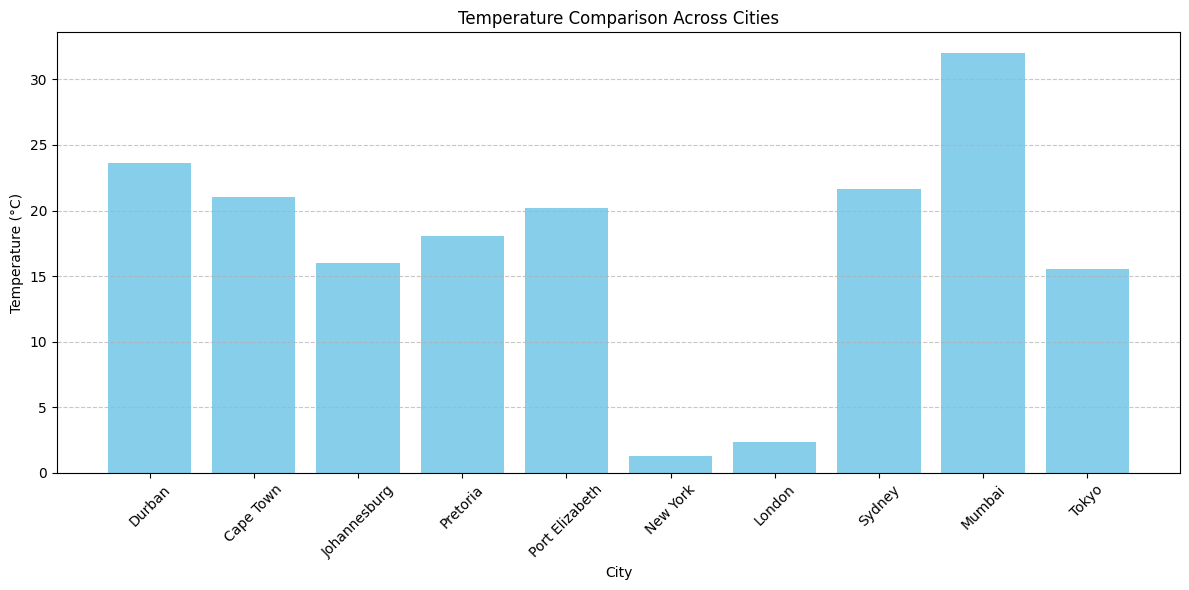

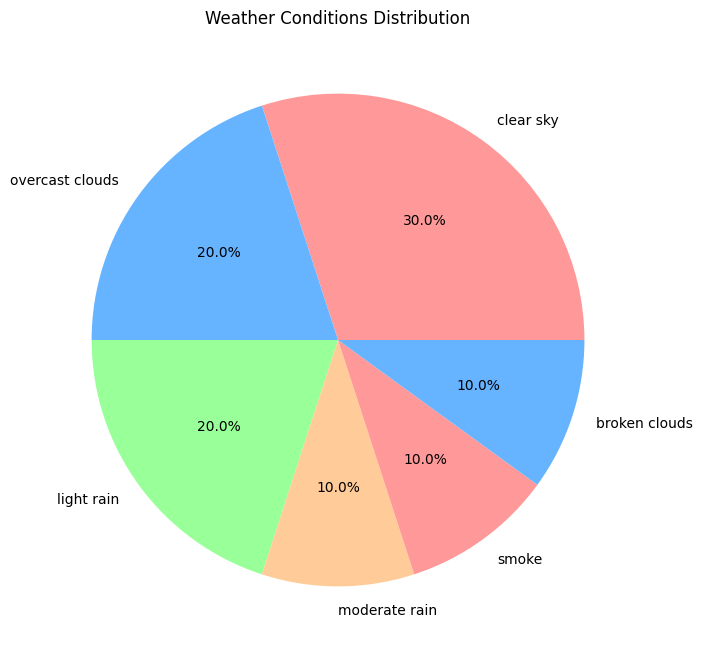

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time  # To handle delays between API calls

# API key
api_key = "07f6f276fcb8caf7495f096cfe7276c0"

# Expanded list of cities
cities = ["Durban", "Cape Town", "Johannesburg", "Pretoria", "Port Elizabeth",
          "New York", "London", "Sydney", "Mumbai", "Tokyo"]

# Initialize a list to store weather data
weather_data = []

# Fetch data for each city with rate limiting
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            weather_data.append({
                "City": data["name"],
                "Temperature (°C)": data["main"]["temp"],
                "Humidity (%)": data["main"]["humidity"],
                "Weather": data["weather"][0]["description"]
            })
        else:
            print(f"Failed to fetch data for {city}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error fetching data for {city}: {e}")

    # Wait 1 second between requests to avoid hitting the rate limit
    time.sleep(1)

# Convert to Pandas DataFrame
df = pd.DataFrame(weather_data)

# Display the data
print("Weather Data:")
print(df)

# Save to a CSV file
df.to_csv("weather_data.csv", index=False)

# ----------- Data Analysis and Visualization -----------

# Plot Temperature Comparison
plt.figure(figsize=(12, 6))
plt.bar(df["City"], df["Temperature (°C)"], color="skyblue")
plt.title("Temperature Comparison Across Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart: Weather Conditions
weather_counts = df["Weather"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title("Weather Conditions Distribution")
plt.show()


**Build a machine learning regression model to predict the temperature of a city based on historical weather data.**

In [3]:
import sklearn
print(sklearn.__version__)


1.6.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

# API key
api_key = "07f6f276fcb8caf7495f096cfe7276c0"

In [5]:
import requests

api_key = "07f6f276fcb8caf7495f096cfe7276c0"
city = "Cape Town"
url = f"http://api.openweathermap.org/data/2.5/forecast?q=Cape Town&appid=07f6f276fcb8caf7495f096cfe7276c0"

response = requests.get(url)
data = response.json()

**The structure of the Dataset **

In [6]:
print(data.keys())

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])


In [7]:
first_forecast = data['list'][0]
print(first_forecast.keys())

dict_keys(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys', 'dt_txt'])


In [8]:
second_forecast = data['main'][0]
print(second_forecast.keys())

KeyError: 'main'

In [ ]:
for forecast in data['list'][:5]:  # Look at the first 5 forecasts
    timestamp = forecast['dt_txt']  # Human-readable timestamp
    temperature = forecast['main']['temp']  # Temperature in Kelvin
    weather_description = forecast['weather'][0]['description']  # Weather description
    print(f"Time: {timestamp}, Temp: {temperature}K, Condition: {weather_description}")


Using the 'city' Key
The 'city' key provides information about the city the forecast is for. You can use it to extract details like the city name, coordinates, and country.

In [ ]:
city_info = data['city']
city_name = city_info['name']
country = city_info['country']
coordinates = city_info['coord']

print(f"City: {city_name}, Country: {country}, Coordinates: {coordinates}")


**We'll loop through the 'list' key and extract timestamps, temperatures, and weather conditions.**

In [ ]:
# Extract weather forecast details into a structured list
forecast_data = []

for forecast in data['list']:
    timestamp = forecast['dt_txt']  # Human-readable timestamp
    temperature = forecast['main']['temp'] - 273.15  # Convert Kelvin to Celsius
    weather_description = forecast['weather'][0]['description']  # Weather description
    wind_speed = forecast['wind']['speed']  # Wind speed
    forecast_data.append([timestamp, temperature, weather_description, wind_speed])

# Convert to a DataFrame
df = pd.DataFrame(forecast_data, columns=['Timestamp', 'Temperature (C)', 'Condition', 'Wind Speed (m/s)'])


In [ ]:
print(df.head(20))

Visualize the Data
Plot Temperature Over Time

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Temperature (C)'], marker='o', label='Temperature (C)')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Temperature (C)')
plt.title('Temperature Forecast Over Time')
plt.legend()
plt.grid()
plt.show()


**Wind Speed Over Time**

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Wind Speed (m/s)'], marker='s', color='orange', label='Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Forecast Over Time')
plt.legend()
plt.grid()
plt.show()


**Humidity over time **

In [ ]:
# Extract weather forecast details into a structured list
forecast_data = []

for forecast in data['list']:
    timestamp = forecast['dt_txt']  # Human-readable timestamp
    temperature = forecast['main']['temp'] - 273.15  # Convert Kelvin to Celsius
    humidity = forecast['main']['humidity']  # Humidity percentage
    weather_description = forecast['weather'][0]['description']  # Weather description
    wind_speed = forecast['wind']['speed']  # Wind speed
    forecast_data.append([timestamp, temperature, humidity, weather_description, wind_speed])

# Convert to a DataFrame
df = pd.DataFrame(forecast_data, columns=['Timestamp', 'Temperature (C)', 'Humidity (%)', 'Condition', 'Wind Speed (m/s)'])


In [ ]:
import matplotlib.pyplot as plt

# Plot Humidity
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Humidity (%)'], marker='x', color='green', label='Humidity (%)')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Forecast Over Time')
plt.legend()
plt.grid()
plt.show()


**Add Multiple Cities**: Predicting outcomes using Machine Learning

In [ ]:
cities = ["Cape Town", "Johannesburg", "Durban", "Pretoria", "Bloemfontein"]
forecast_list = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"
    response = requests.get(url)
    data = response.json()

    for forecast in data['list']:
        timestamp = forecast['dt_txt']
        temperature = forecast['main']['temp'] - 273.15
        humidity = forecast['main']['humidity']
        condition = forecast['weather'][0]['description']
        wind_speed = forecast['wind']['speed']
        forecast_list.append([city, timestamp, temperature, humidity, condition, wind_speed])

# Convert to a DataFrame
df_multi = pd.DataFrame(forecast_list, columns=['City', 'Timestamp', 'Temperature (C)', 'Humidity (%)', 'Condition', 'Wind Speed (m/s)'])
print(df_multi.head(100))


**Average temperature, humidity, or wind speed per city.**

In [ ]:
# Average temperature by city
avg_temp = df_multi.groupby('City')['Temperature (C)'].mean()
print("Average Temperature per City:")
print(avg_temp)

# Grouping for detailed statistics
city_stats = df_multi.groupby('City').agg({
    'Temperature (C)': ['mean', 'max', 'min'],
    'Humidity (%)': ['mean', 'max', 'min'],
    'Wind Speed (m/s)': ['mean', 'max', 'min']
})
print("\nCity Weather Statistics:")
print(city_stats)


**Machine Learning**: Predict Future Temperatures

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection (use numeric columns)
features = df_multi[['Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)']].values
target = df_multi['Temperature (C)'].values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Train a Simple Linear Regression Model**

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Example Prediction
print("Predicted:", predictions[:5])
print("Actual:", y_test[:5])


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Temperatures')
plt.scatter(range(len(predictions)), predictions, color='red', alpha=0.6, label='Predicted Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Temperature (C)')
plt.title('Actual vs Predicted Temperatures')
plt.legend()
plt.show()


In [ ]:
cities = ["Cape Town", "Johannesburg", "Durban", "Pretoria", "Bloemfontein"]

all_data = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"
    response = requests.get(url)
    data = response.json()

    for entry in data['list']:
        weather_info = {
            'City': city,
            'Date': entry['dt_txt'],
            'Temperature (C)': entry['main']['temp'] - 273.15,  # Convert from Kelvin to Celsius
            'Humidity (%)': entry['main']['humidity'],
            'Wind Speed (m/s)': entry['wind']['speed'],
        }
        all_data.append(weather_info)

# Combine all data into a single DataFrame
multi_city_df = pd.DataFrame(all_data)

# Display the first few rows
print(multi_city_df.head(100))


**Analyzing trends, averages, and correlations for weather patterns across cities.**

In [ ]:
# Group data by city
city_stats = multi_city_df.groupby('City')[['Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)']].mean()
print(city_stats)

# Plotting
multi_city_df.groupby('City')['Temperature (C)'].mean().plot(kind='bar', color='orange', title='Average Temperature by City')
plt.ylabel('Temperature (C)')
plt.show()

multi_city_df.groupby('City')['Humidity (%)'].mean().plot(kind='bar', color='blue', title='Average Humidity by City')
plt.ylabel('Humidity (%)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Include the 'City' as a categorical feature
multi_city_df['City'] = multi_city_df['City'].astype('category').cat.codes  # Encode city names

X = multi_city_df[['Humidity (%)', 'Wind Speed (m/s)', 'City']]  # Features
y = multi_city_df['Temperature (C)']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")


**Dashboard for Visualization**

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st

st.title("Weather Prediction Dashboard")

# Select a city
selected_city = st.selectbox("Select a City", cities)

# Filter data for the selected city
city_data = multi_city_df[multi_city_df['City'] == selected_city]

# Plot temperature trends
st.line_chart(city_data.set_index('Date')['Temperature (C)'])

# Display summary stats
st.write(city_data.describe())


In [ ]:
!pip install streamlit pyngrok

In [ ]:
import streamlit as st

st.title("Weather Prediction Dashboard")

# Select a city
selected_city = st.selectbox("Select a City", cities)

# Filter data for the selected city
city_data = multi_city_df[multi_city_df['City'] == selected_city]

# Plot temperature trends
st.line_chart(city_data.set_index('Date')['Temperature (C)'])

# Display summary stats
st.write(city_data.describe())
